## Logistic regression with cross-entropy loss function
In this notebook we build logistic regression with cross entropy loss functions, and $y\in\{1,0\}$

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io as sio
data = sio.loadmat('spamData.mat')

In [2]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [3]:
def predict(X, w):
    z = np.dot(X, w)
    return sigmoid(z)

In [4]:
def grad(w, X, y):
    N = len(X)
    predictions = predict(X, w)
    gradient = np.dot(X.T,  predictions - y)
    gradient /= N
    return gradient

In [5]:
def classify(predictions):
    return np.vectorize(lambda prob: 1 if prob >= .5 else 0)(predictions)

In [6]:
def accuracy(predicted_result, actual_result):
    diff = predicted_result - actual_result
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [7]:
def misclassification(w, X, y):
    [m,n]=X.shape
    prediction = predict(X, w)
    results = classify(prediction)
    return 1 - accuracy(results, y)

In [8]:
def train(Xtrain, ytrain, Xtest, ytest, w, eta, iters):
    mis_classification_train = []
    mis_classification_test = []

    for i in range(iters):
        w -= grad(w, Xtrain, ytrain) * eta
        
        if i % 10 == 0:
            mis_train = misclassification(w, Xtrain, ytrain)
            mis_classification_train.append(mis_train)
            mis_test = misclassification(w, Xtest, ytest)
            mis_classification_test.append(mis_test)
            print("iter: {}, training misclassification: {}".format(str(i), str(mis_train)))
            print("iter: {}, test misclassification: {}".format(str(i), str(mis_test)))

    return w, mis_classification_train, mis_classification_test

In [9]:
Xtrain = data['Xtrain']
ytrain = data['ytrain']
Xtest = data['Xtest']
ytest = data['ytest']
Xtrain = np.log(Xtrain +0.1)
[mtrain, n] = Xtrain.shape
Xtrain = np.insert(Xtrain,[0], np.ones((mtrain,1)),axis = 1)
[mtest, n] = Xtest.shape
Xtest = np.insert(Xtest,[0], np.ones((mtest,1)),axis = 1)
Xtest = np.log(Xtest +0.1)

In [10]:
[m,n] = Xtrain.shape

In [11]:
init_weights = np.zeros((n, 1))

In [13]:
[weights, mis_train, mis_test] = train(Xtrain, ytrain, Xtest, ytest, init_weights, 0.1, 1000)

iter: 0, training misclassification: 0.397389885807504
iter: 0, test misclassification: 0.38736979166666674
iter: 10, training misclassification: 0.397389885807504
iter: 10, test misclassification: 0.38736979166666674
iter: 20, training misclassification: 0.2623164763458401
iter: 20, test misclassification: 0.24153645833333337
iter: 30, training misclassification: 0.10603588907014683
iter: 30, test misclassification: 0.11393229166666663
iter: 40, training misclassification: 0.09265905383360518
iter: 40, test misclassification: 0.10026041666666663
iter: 50, training misclassification: 0.08515497553017948
iter: 50, test misclassification: 0.09635416666666663
iter: 60, training misclassification: 0.08156606851549753
iter: 60, test misclassification: 0.09244791666666663
iter: 70, training misclassification: 0.07993474714518756
iter: 70, test misclassification: 0.091796875
iter: 80, training misclassification: 0.07536704730831978
iter: 80, test misclassification: 0.0859375
iter: 90, trainin

In [14]:
print(misclassification(weights, Xtest, ytest))

0.05859375


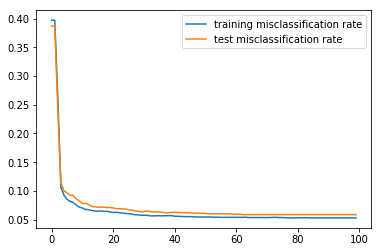

In [15]:
fig=plt.figure()
plt.plot(mis_train, label='training misclassification rate')
plt.plot(mis_test, label='test misclassification rate')
plt.legend()
plt.show()